170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


2024-12-08 10:55:20.947610: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


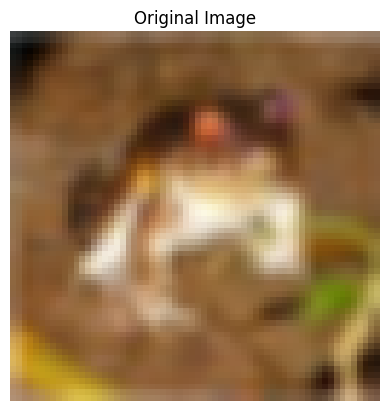

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


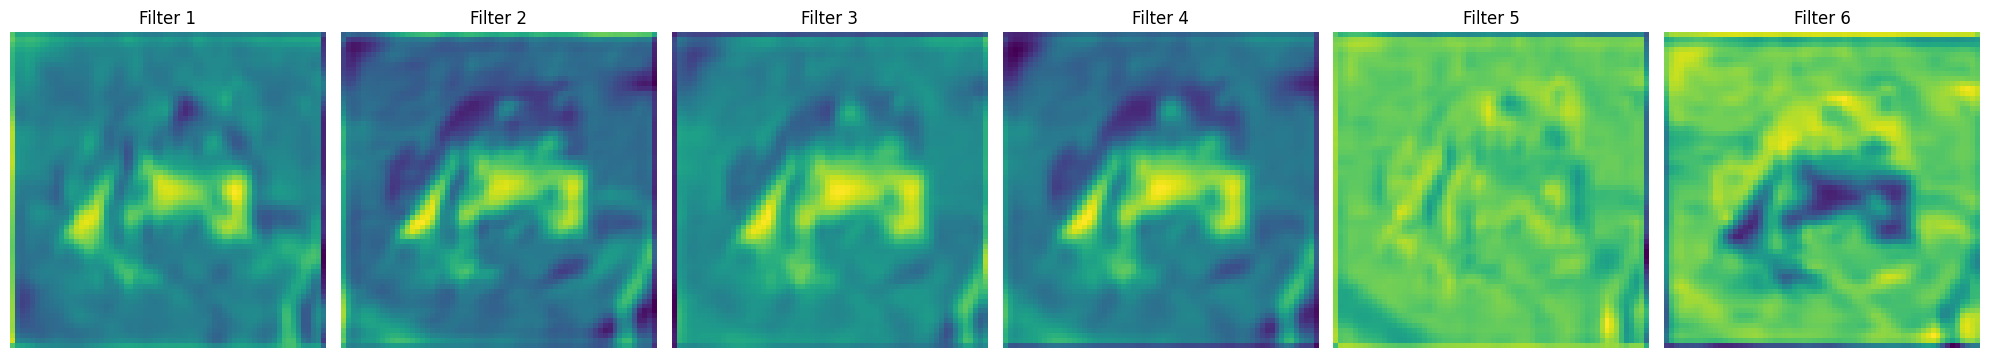

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load a sample image (e.g., from CIFAR-10)
(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
input_image = x_train[0]  # Use the first image
input_image = tf.image.resize(input_image, (64, 64))  # Resize for better visualization
input_image = input_image / 255.0  # Normalize the image

# Display the original image
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Define a convolutional layer with multiple filters
conv_layer = tf.keras.layers.Conv2D(
    filters=6, kernel_size=(3, 3), activation=None, padding="same"
)

# Create a simple model to pass the image through the filters
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(64, 64, 3)), conv_layer])

# Apply the filters
output = model(np.expand_dims(input_image, axis=0))  # Add batch dimension
feature_maps = output[0]  # Remove batch dimension

# Visualize each filter's output
num_filters = feature_maps.shape[-1]
fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
x_x    ffsgddd
for i in range(num_filters):
    axes[i].imshow(feature_maps[:, :, i], cmap='viridis')
    axes[i].axis("off")
    axes[i].set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()


In [4]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.4 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 147.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 178.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 155.0 MB/s eta 0:00:00


## cnn base

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

# Create a Convolutional Base
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
])

# Display the model summary
model.summary()


/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

## Add dense layer

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Build the Convolutional Neural Network
model = models.Sequential([
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax'),  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print("Model Summary:")
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on test data
print("\nEvaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Display accuracy
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2992 - loss: 1.8720 - val_accuracy: 0.5237 - val_loss: 1.3139
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5151 - loss: 1.3478 - val_accuracy: 0.5910 - val_loss: 1.1321
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5877 - loss: 1.1666 - val_accuracy: 0.6378 - val_loss: 1.0234
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6339 - loss: 1.0395 - val_accuracy: 0.6703 - val_loss: 0.9361
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6670 - loss: 0.9628 - val_accuracy: 0.6485 - val_loss: 0.9955

Evaluating the model...
313/313 - 1s - 2ms/step - accuracy: 0.6485 - loss: 0.9955

Test Accuracy: 64.85%


## mnist classification

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8261 - loss: 0.5539 - val_accuracy: 0.9809 - val_loss: 0.0622
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9766 - loss: 0.0802 - val_accuracy: 0.9861 - val_loss: 0.0456
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9856 - loss: 0.0511 - val_accuracy: 0.9873 - val_loss: 0.0404
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9874 - val_loss: 0.0477
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9912 - val_loss: 0.0335

Evaluating the model...
313/313 - 1s - 2ms/step - accuracy: 0.9926 - loss: 0.0264
Test Accuracy: 99.26%

Making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


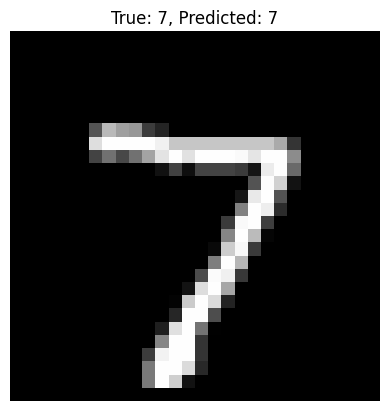

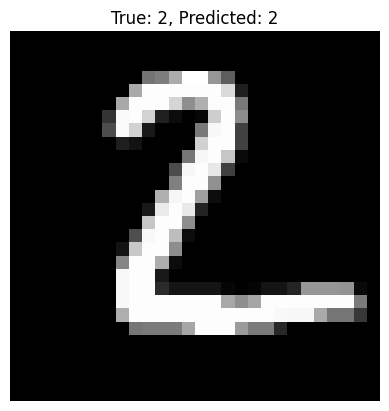

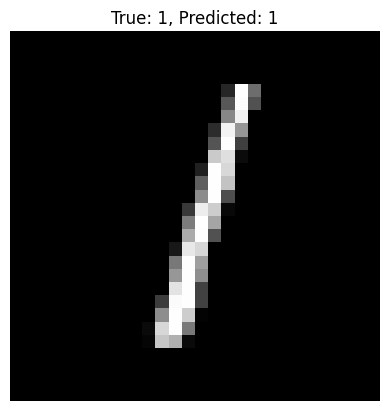

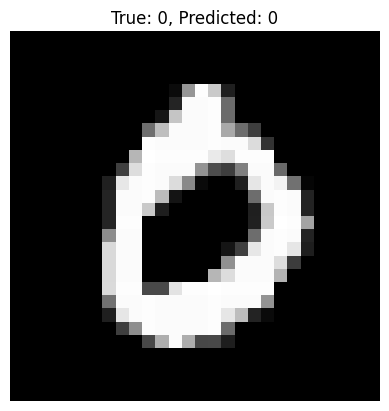

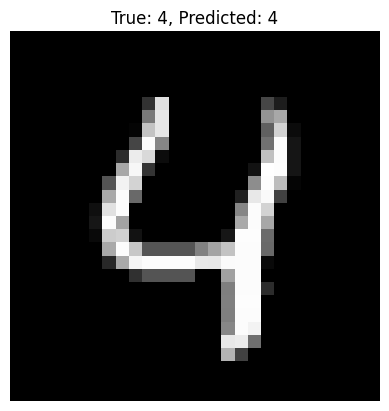

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0  # Add channel dimension and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print("Model Summary:")
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
print("\nEvaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualize predictions
print("\nMaking predictions...")
predictions = model.predict(x_test[:5])

# Plot some test images with predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predictions[i].argmax()}")
    plt.axis("off")
    plt.show()


lables [5 0 4 1 9]
Training Data Shape: (60000, 28, 28), Labels Shape: (60000,)
Testing Data Shape: (10000, 28, 28), Labels Shape: (10000,)


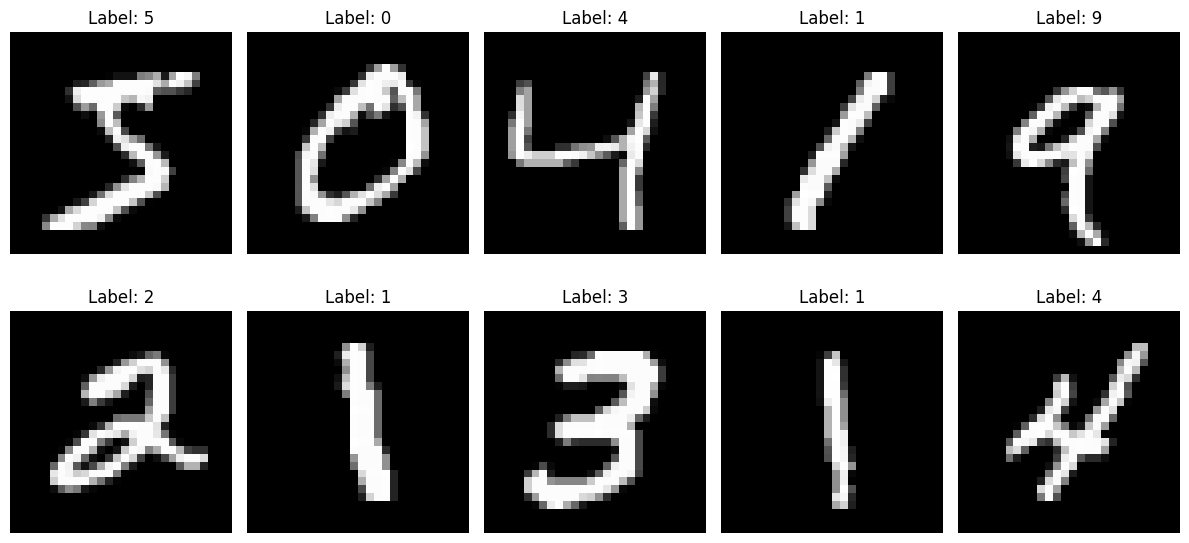

Class Distribution in Training Data:
Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples

Statistics of Training Images:
Pixel Value Range: 0 to 255
Mean Pixel Value: 33.32
Standard Deviation of Pixel Values: 78.57


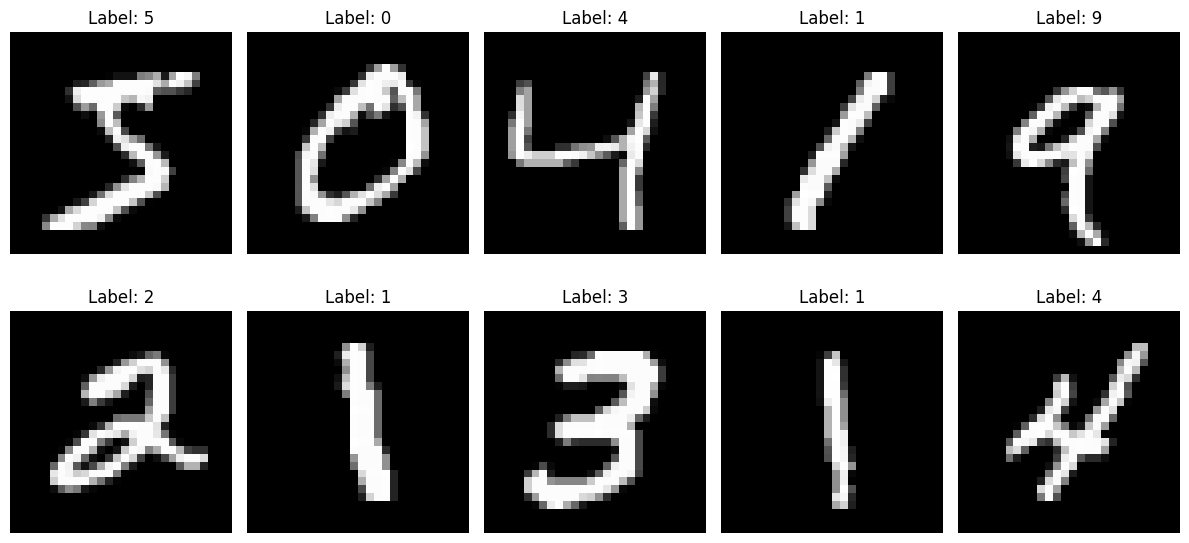

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("lables", y_train[:5])

# Print the shapes of training and testing datasets
print(f"Training Data Shape: {x_train.shape}, Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {x_test.shape}, Labels Shape: {y_test.shape}")

# Display the first 10 images and their labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Check the class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution in Training Data:")
for label, count in class_distribution.items():
    print(f"Class {label}: {count} samples")

# Compute basic statistics for training data
print("\nStatistics of Training Images:")
print(f"Pixel Value Range: {x_train.min()} to {x_train.max()}")
print(f"Mean Pixel Value: {x_train.mean():.2f}")
print(f"Standard Deviation of Pixel Values: {x_train.std():.2f}")

# Normalize data for visualization purposes
x_train_normalized = x_train / 255.0

# Visualize normalized data
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_normalized[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


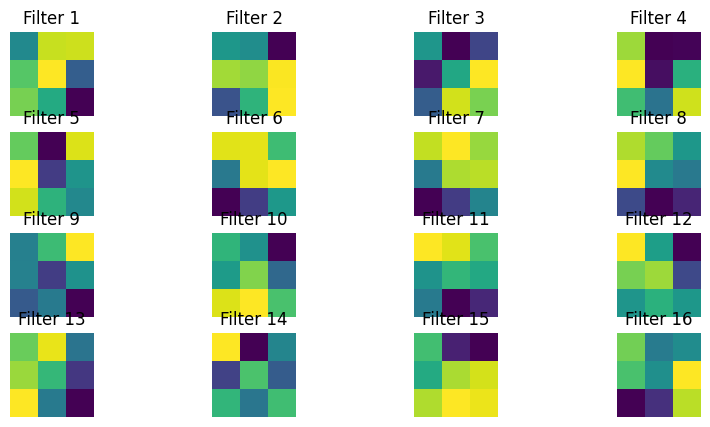

In [12]:
# Extract weights of the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to 0–1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first few filters
num_filters = filters.shape[-1]
plt.figure(figsize=(10, 5))
for i in range(min(num_filters, 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.title(f"Filter {i+1}")
    plt.axis("off")
plt.show()


AttributeError: The layer sequential_3 has never been called and thus has no defined input.

### Consider any image of .jpeg format and apply the convolution layer,
### activation layer and pooling layer operation to extract the inside
### feature.Visualize the outputs of all layers.

2024-12-08 13:11:39.781456: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


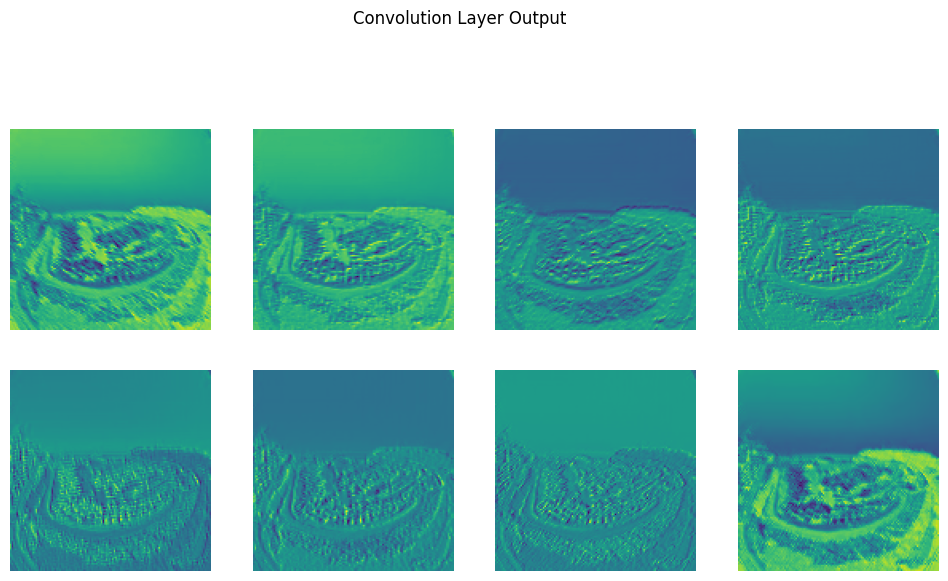

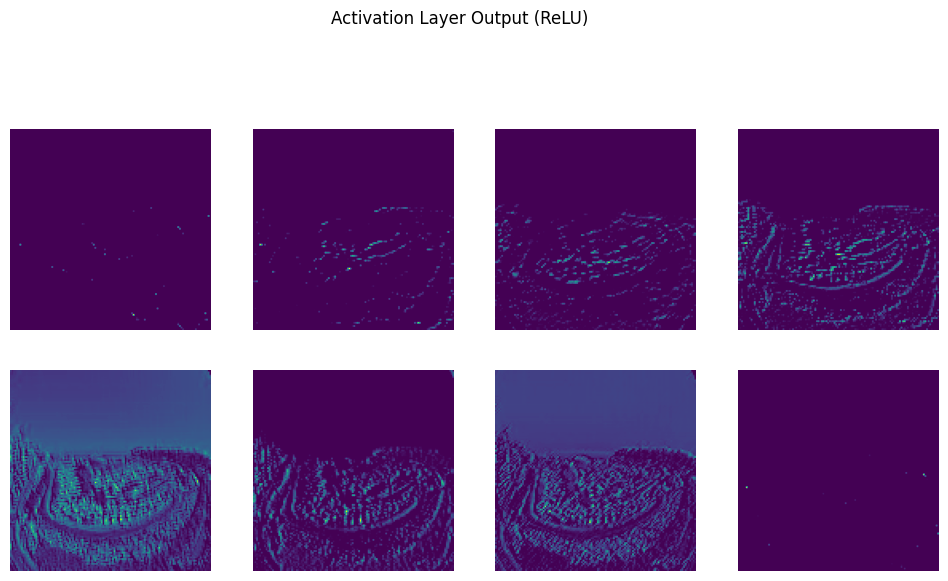

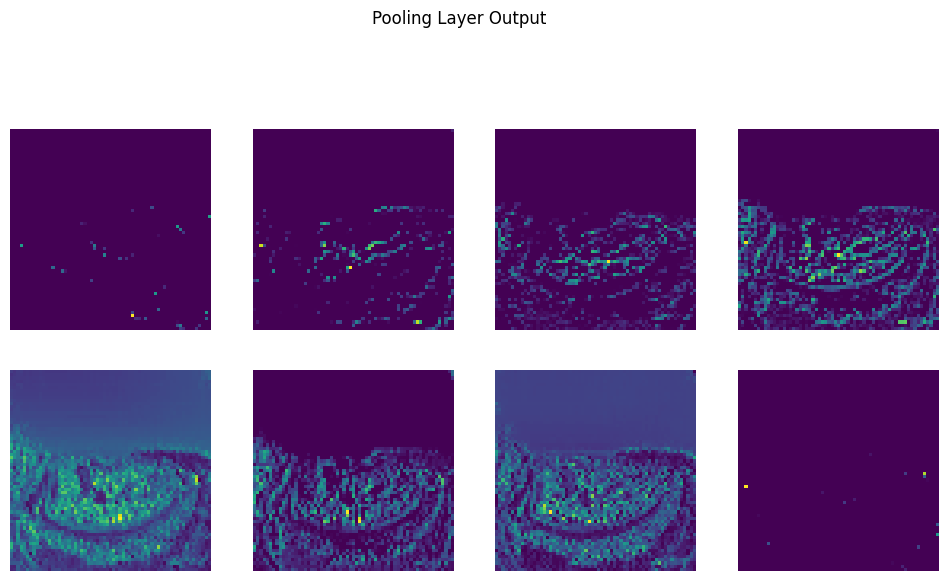

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img('../image.jpeg', target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Define the model with convolution, activation, and pooling layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation=None, input_shape=(128, 128, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
])

# Get the output of each layer
conv_output = model.layers[0](img_array)
activation_output = model.layers[1](conv_output)
pooling_output = model.layers[2](activation_output)

# Function to visualize the feature maps
def visualize_feature_maps(feature_maps, title):
    plt.figure(figsize=(12, 12))
    for i in range(min(feature_maps.shape[-1], 16)):  # Display up to 16 feature maps
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize outputs
visualize_feature_maps(conv_output, "Convolution Layer Output")
visualize_feature_maps(activation_output, "Activation Layer Output (ReLU)")
visualize_feature_maps(pooling_output, "Pooling Layer Output")
